# Example 6.12: Hubble's Law

In 1929, Edwin Hubble examined the data related the radial velocity $v$ of 24 extra-galactic nebulae, to their distance $r$ from our galaxy. He fit them with a straight line: 

$ v = Hr$, where $H$ is now known as the Hubble constant. 

His measurements are given in the file ```hubble.txt```, where the first column represents the distance $r$ in Mpc (pc=parsec, defined as the distance at which 1 astronomical unit, the mean Earth-sun distance, subtends an angle of one arcsecond, i.e. 1/3600 of a degree), and the second column is the velocity $v$ in km/s. 

We will assume that the errors on $v$ are $\sigma =1~\mathrm{km/s}$, but we will re-evaluate this assumption later on. 

a) Load the file using ```pandas``` and plot the data using ```matplotlib```. 

b) Compute the least-squares straight-line fit to the data in the form: 

$v(r) = a + Hr$, 

including the errors on the parameters, $\sigma_a$ and $\sigma_H$. 

c) Plot your best fit along with the data. 

d) Determine the $\chi^2$ of the fit. Given its value, what would a better estimate of the average error on the measurements be? 

Solution:

a) Let's load the data:

In [1]:
import pandas as pd
import numpy as np

# load the data:
df = pd.read_csv('hubble.txt', sep='\t') # '\t' represents tabs
# change the names to the expected ones
df.columns = ["r", "v"]
# print to see how it looks like
print(df)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
        r     v
0   0.032   170
1   0.034   290
2   0.214  -130
3   0.263   -70
4   0.275  -185
5   0.275  -220
6   0.450   200
7   0.500   290
8   0.500   270
9   0.630   200
10  0.800   300
11  0.900   -30
12  0.900   650
13  0.900   150
14  0.900   500
15  1.000   920
16  1.100   450
17  1.100   500
18  1.400   500
19  1.700   960
20  2.000   500
21  2.000   850
22  2.000   800
23  2.000  1090


(b) Let's use matplotlib to plot the data points: 

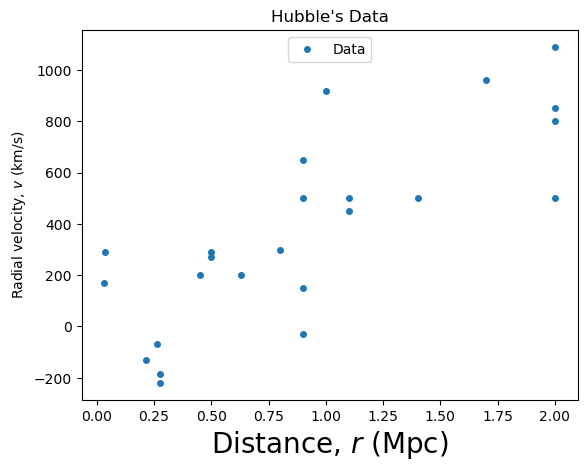

In [2]:
# Let's plot them!
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

fig, ax = plt.subplots() # create the elements required for matplotlib. 
# set the labels and titles:
ax.set_xlabel(r'Distance, $r$ (Mpc)', fontsize=20) # set the x label
ax.set_ylabel(r'Radial velocity, $v$ (km/s)', fontsize=10) # set the y label 
ax.set_title("Hubble's Data")

# let's plot the pandas data:
ax.plot(df['r'], df['v'], marker='o', ms=4, lw=0, label='Data')

# construct the legend:
ax.legend(loc='upper center')  # Add a legend

plt.show() # show the plot here

c) We now implement the best-fit formulae to operate on the arrays containing the data and calculate the best-fit parameters $a$ and $H$. We assume an error on the data $\sigma_i = 1 \forall i$.

In [3]:
# linear regression function
# takes as input the x, y and error (sigma) arrays
def LinearRegression(x, y, error):
    """Return the linear regression parameters a1 and a2 and their errors, for y = a_1 + a_2 x"""
    # first calculate xbar, ybar, S_{xy}, S_{xx}:
    S = np.sum( np.power(np.divide(1,error),2) )
    Sx = np.sum( np.divide(x,np.power(error,2)))
    Sy = np.sum( np.divide(y,np.power(error,2)))
    Sxx = np.sum( np.divide(np.power(x,2),np.power(error,2)))
    Sxy = np.sum( np.divide(np.multiply(x,y),np.power(error,2)))
    Delta = S * Sxx - Sx**2
    # get the coefficients:
    a2 = (S * Sxy - Sx * Sy)/Delta
    a1 = (Sxx * Sy - Sx * Sxy)/Delta
    # and their errors: 
    sa1 = np.sqrt(Sxx / Delta)
    sa2 = np.sqrt(S/Delta)
    return a1, a2, sa1, sa2

In [4]:
# create an array of ones for the error, equal to the length of the data
error = np.ones(len(df))
# use the linear regression function to get a1 and a2: 
a, H, ea, eH = LinearRegression(df['r'], df['v'], error)
print('a=', a, '+-', ea)
print('H=', H, '+-', eH)

a= -40.78364909586009 +- 0.3582440850412932
H= 454.1584409226284 +- 0.3230298778843086


(c) Now let's plot the best fit line along with the data:

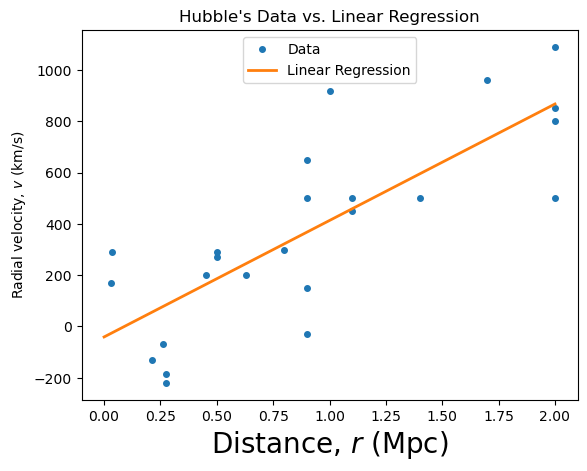

In [5]:
# Let's plot them!
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

fig, ax = plt.subplots() # create the elements required for matplotlib. 
# set the labels and titles:
ax.set_xlabel(r'Distance, $r$ (Mpc)', fontsize=20) # set the x label
ax.set_ylabel(r'Radial velocity, $v$ (km/s)', fontsize=10) # set the y label 
ax.set_title("Hubble's Data vs. Linear Regression")

# let's plot the pandas data:
ax.plot(df['r'], df['v'], marker='o', ms=4, lw=0, label='Data')

# and plot the linear regression:
r = np.linspace(0,2.00,100)
v = a + H * r
ax.plot(r, v, lw=2, label='Linear Regression')

# construct the legend:
ax.legend(loc='upper center')  # Add a legend

plt.show() # show the plot here

(d) To determine the $\chi^2$, we will write a function to calculate it, given the data and the best-fit line. 

In [6]:
# function to calculate chi-squared in linear regression:
def chisqLinearRegression(x, y, error, a1, a2):
    """Calculates chi-squared given the data and the best-fit line in the form y = a1 + a2 * x"""
    chisq = np.sum( np.power( np.divide(np.subtract(y,a1 + a2 * x),error), 2) )
    return chisq

Let's use this: 

In [7]:
chisq = chisqLinearRegression(df['r'], df['v'], error, a, H)
print("The chi-square is", chisq)

The chi-square is 1193442.3662721403


This seems huge! We obviously have underestimated the error dramatically! What should the average error be? 

There are two parameters and 24 data points, hence the number of degrees of freedom = 24-2 = 22, so we expected $\chi^2 \simeq 22$ for a reasonable fit, if the errors are Gaussian and uncorrelated. 

To achieve this, we would need to rescale the error by: 

In [8]:
errornew = np.sqrt(chisq/22)*error
print("A better estimate for the error is", np.sqrt(chisq/22))
chisq = chisqLinearRegression(df['r'], df['v'], errornew, a, H)
print("The new chi-square is", chisq)

A better estimate for the error is 232.9106701830066
The new chi-square is 22.0


Let's now use the new error to get the new error estimates on the paramerters:

In [9]:
# use the linear regression function to get a1 and a2: 
a, H, ea, eH = LinearRegression(df['r'], df['v'], errornew)
print('a=', a, '+-', ea)
print('H=', H, '+-', eH)

a= -40.7836490958606 +- 83.43886993606564
H= 454.1584409226285 +- 75.23710534716912


This seems more reasonable, but still, the modern value of Hubble's constant is $\mathcal{O}(70)$ Mpc/(km/s)!

Note, however, that there is currently a tension in the measurements, for more details see, e.g.: https://arxiv.org/pdf/2103.01183.pdf.